In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [64]:
image = cv2.imread(r'C:\Users\saksh\Downloads\Original Capture.jpg')

In [65]:
# Preprocess the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [66]:
# Adaptive thresholding
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)


In [67]:
# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [68]:
# Measure dimensions for each rectangular contour
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

In [69]:
# Check if the polygon has four corners (a rectangle)
if len(approx) == 4:
    # Calculate bounding box dimensions
    x, y, w, h = cv2.boundingRect(approx)

    # Calculate length and width
    length = max(w, h)
    width = min(w, h)

In [61]:
# Draw the rectangle and its corners on the image
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
for corner in approx:
    cv2.circle(image, tuple(corner[0]), 5, (0, 0, 255), -1)

# Print or use the measurements as needed
print("Length:", length)
print("Width:", width)


Length: 640
Width: 480


In [62]:
# Convert BGR image to RGB for display
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

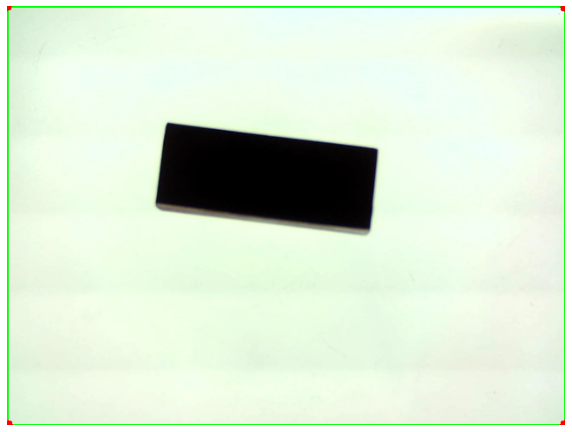

In [53]:
# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()